In [4]:
# install.packages(c('readr', 'WVPlots', 'dplyr', 'ggplot2', 'tidyr', 'stringr'))

library(readr)
library(WVPlots)
library(dplyr)
library(ggplot2)
library(tidyr)
library(stringr)

Loading required package: wrapr


Attaching package: ‘dplyr’


The following object is masked from ‘package:wrapr’:

    coalesce


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidyr’


The following objects are masked from ‘package:wrapr’:

    pack, unpack




In [5]:
shows <- read_csv('shows.csv') %>% mutate(Rotten_Tomatoes = Rotten_Tomatoes/10)
glimpse(shows)

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  Title = col_character(),
  Year = col_double(),
  Age = col_character(),
  IMDb = col_double(),
  Rotten_Tomatoes = col_double(),
  Streamings = col_character(),
  Genre = col_character()
)




Rows: 462
Columns: 8
$ X1              <dbl> 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16,…
$ Title           <chr> "breaking bad", "stranger things", "sherlock", "better…
$ Year            <dbl> 2008, 2016, 2010, 2015, 2005, 2011, 2005, 2013, 2005, …
$ Age             <chr> "18+", "16+", "16+", "18+", "16+", "18+", "16+", "18+"…
$ IMDb            <dbl> 9.5, 8.8, 9.1, 8.7, 8.9, 8.8, 8.4, 8.8, 9.2, 8.2, 8.7,…
$ Rotten_Tomatoes <dbl> 9.6, 9.3, 7.8, 9.7, 8.1, 8.3, 9.3, 9.2, 10.0, 8.1, 9.4…
$ Streamings      <chr> "Netflix", "Netflix", "Netflix", "Netflix", "Netflix",…
$ Genre           <chr> "crime,drama,thriller", "horror,mystery,scifi,fantasy"…


In [6]:
data <- shows %>% select(IMDb, Rotten_Tomatoes) %>% 
                  within(Contagem <- ave(IMDb,
                                         list(IMDb, Rotten_Tomatoes),
                                         FUN = length)) %>% 
                  unique() %>% 
                  arrange(-IMDb) %>% 
                  mutate(Resultado = ifelse(IMDb > 6 & Rotten_Tomatoes > 6,
                                            'Agradou a todos',
                                            ifelse(IMDb > 6,
                                                   'Agradou a critica',
                                                   ifelse(Rotten_Tomatoes > 6,
                                                          'Agradou o público',
                                                          'Fracassou')))) %>% 
                  mutate(Resultado = factor(as.character(Resultado),
                                            levels = c('Agradou a todos',
                                                       'Agradou a critica',
                                                       'Agradou o público',
                                                       'Fracassou')))

head(data)

IMDb,Rotten_Tomatoes,Contagem,Resultado
<dbl>,<dbl>,<dbl>,<fct>
9.5,9.6,1,Agradou a todos
9.3,9.3,1,Agradou a todos
9.2,10.0,1,Agradou a todos
9.1,7.8,1,Agradou a todos
9.1,10.0,2,Agradou a todos
8.9,8.1,1,Agradou a todos


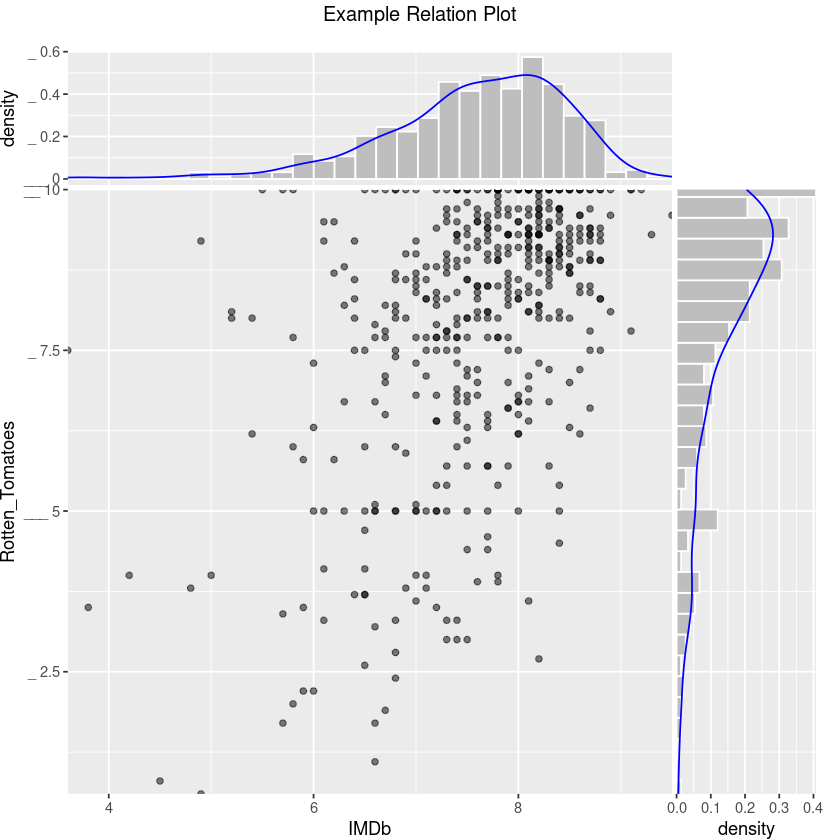

In [7]:
ScatterHist(shows,
            'IMDb',
            'Rotten_Tomatoes',
            smoothmethod = 'none', 
            title = 'Example Relation Plot',
            estimate_sig = TRUE)

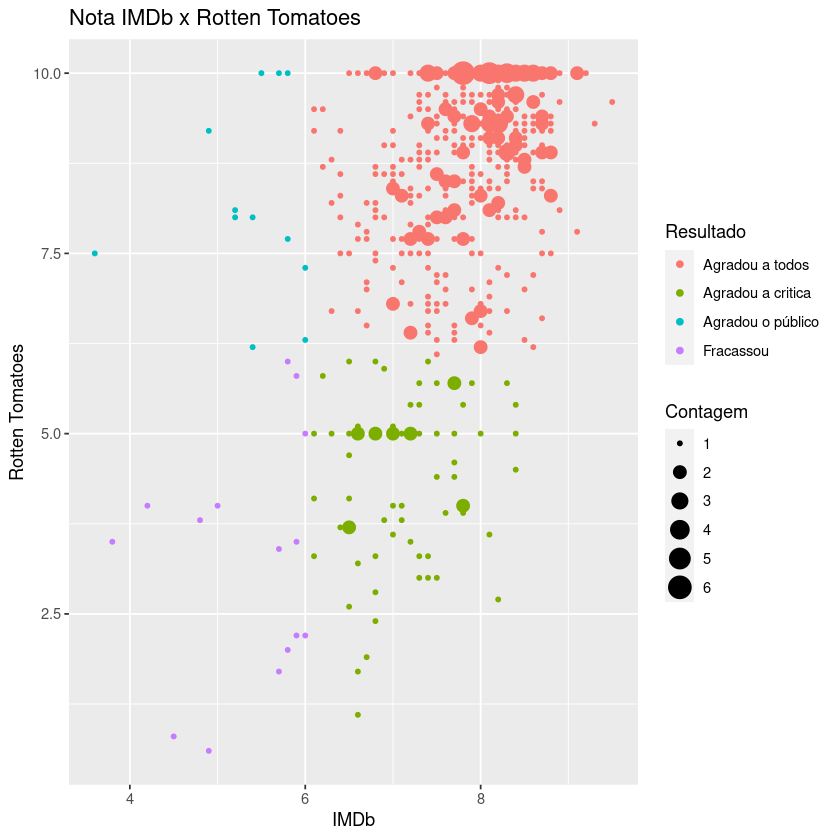

In [8]:
colors <- rev(RColorBrewer::brewer.pal(n = 4,
                                       name = 'Blues'))

data %>% ggplot(aes(x = IMDb, y = Rotten_Tomatoes, size = Contagem, color = Resultado)) +
labs(x = 'IMDb', y = 'Rotten Tomatoes', title = 'Nota IMDb x Rotten Tomatoes') + 
scale_fill_manual(values = colors) +
geom_point()

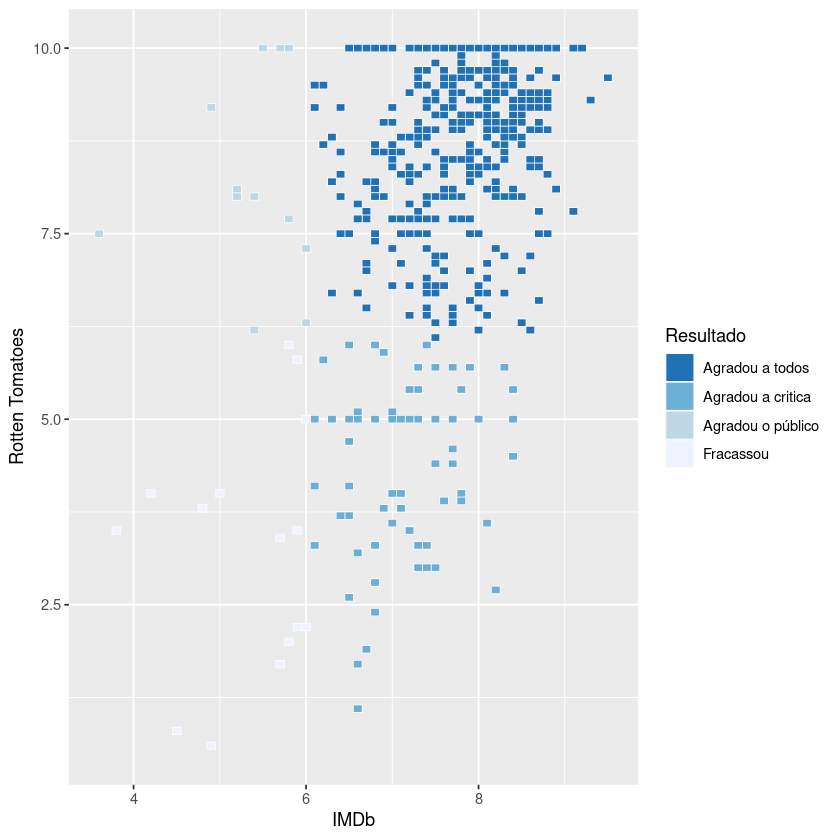

In [9]:
colors <- rev(RColorBrewer::brewer.pal(n = 4,
                                       name = 'Blues'))

heatmap <- ggplot(data, aes(x = IMDb, y = Rotten_Tomatoes, fill = Resultado)) +
           geom_tile(colour = 'white', size = 0.2) +
           labs(x = 'IMDb', y = 'Rotten Tomatoes') +
           scale_fill_manual(values = colors)

heatmap

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


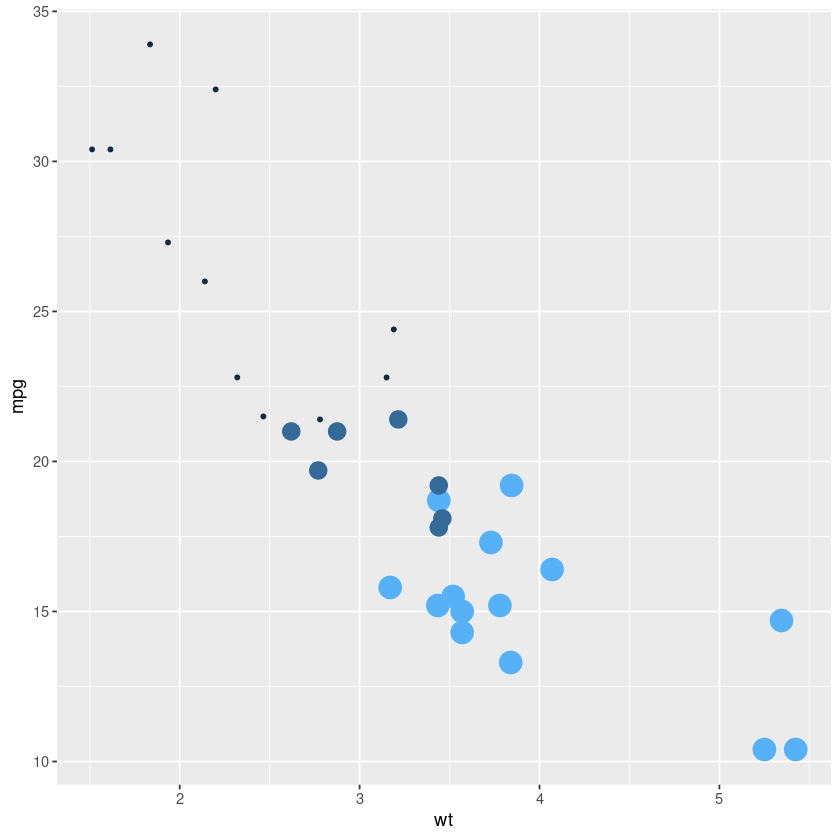

In [23]:
# library
library(ggplot2)
library(ggExtra)
 
# The mtcars dataset is proposed in R
head(mtcars)
 
# classic plot :
p <- ggplot(mtcars, aes(x=wt, y=mpg, color=cyl, size=cyl)) +
      geom_point() +
      theme(legend.position="none")
 
# with marginal histogram
p1 <- ggMarginal(p, type="histogram")
 
# marginal density
p2 <- ggMarginal(p, type="density")
 
# marginal boxplot
p3 <- ggMarginal(p, type="boxplot")

p
# p1
# p2
# p3

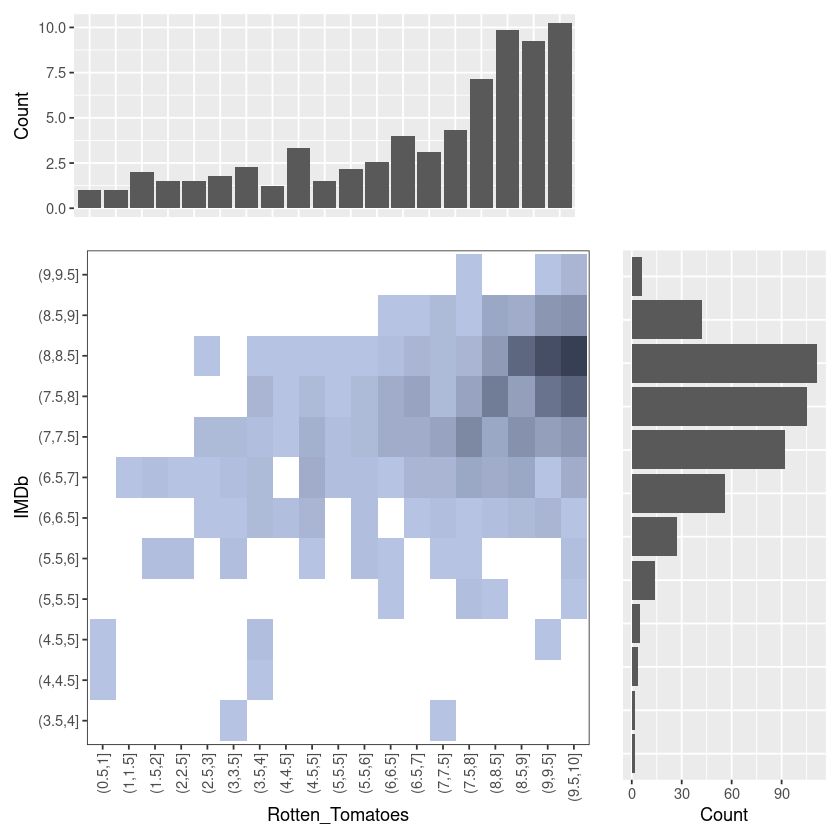

In [148]:
require(ggplot2)
require(gtable)
require(grid)
library(dplyr)
library(scales)



# plot the heatmap
gg_hm = df %>% 
    ggplot(aes(y = IMDb, x = Rotten_Tomatoes, fill = Count)) + 
    geom_tile() + theme_bw() +
    scale_fill_gradient(low="#b6c3e2", high="#363F54") +
    theme(plot.margin = unit(c(3,3,3,3), "mm"),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.text.x = element_text(angle = 90,
                                     vjust = 0.5,
                                     hjust=1))

gg_rows = df %>% 
    group_by(Rotten_Tomatoes) %>% 
    summarize(Count = mean(Count)) %>% 
    ggplot(aes(x = Rotten_Tomatoes,y = Count)) + 
    geom_bar(stat = "identity", position = "dodge") +
    theme(plot.margin = unit(c(3,3,3,3), "mm"),
          axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank())


gg_cols = df %>% 
    group_by(IMDb) %>% 
    summarize(Count = sum(Count)) %>% 
    ggplot(aes(x = IMDb, y = Count))+ 
    geom_bar(stat = "identity", position = "dodge") + 
    coord_flip() +
    theme(plot.margin = unit(c(3,3,3,3), "mm"),
          axis.title.y=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks.y=element_blank())

## plot heatmap without legend
g <- ggplotGrob(gg_hm + theme(legend.position="none"))

## add column and put column barplot within
g <- gtable_add_cols(g, unit(5,"cm"))
g <- gtable_add_grob(g, ggplotGrob(gg_cols), 
                     t = 1, l=ncol(g), b=nrow(g), r=ncol(g))

## add row on top and put row barplot within
g <- gtable_add_rows(g, unit(5,"cm"), 0)
g <- gtable_add_grob(g, ggplotGrob(gg_rows),
                     t = 1, l=1, b=1, r=5) 

grid.newpage()
grid.draw(g)

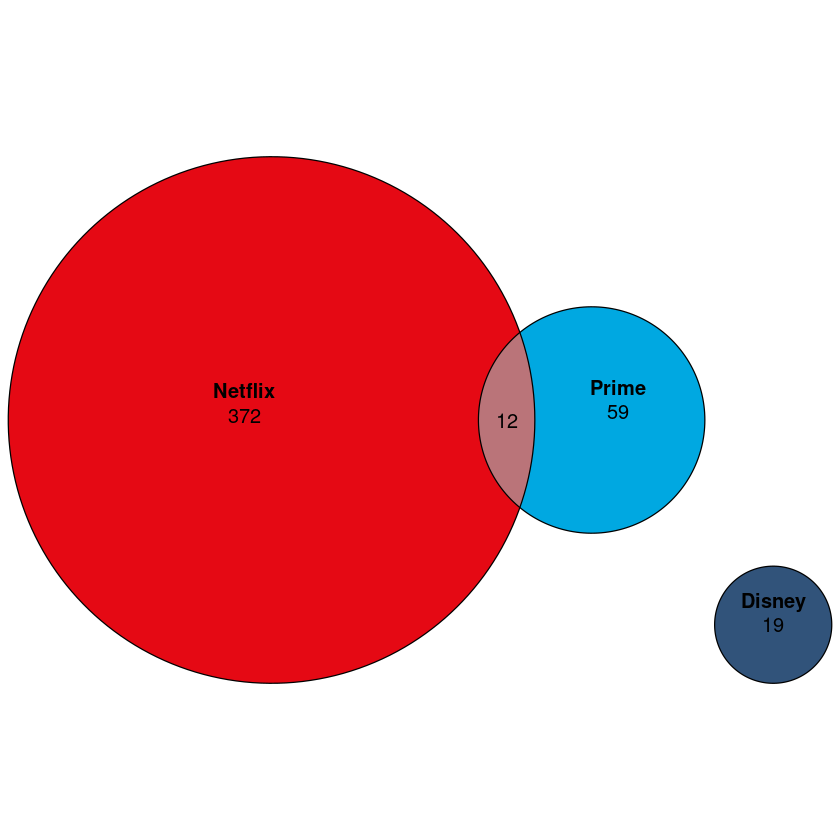

In [143]:
library(eulerr)

Netflix <- (shows %>% filter(grepl('Netflix', Streamings)))$Title
Prime <- (shows %>% filter(grepl('Prime', Streamings)))$Title
Disney <- (shows %>% filter(grepl('Disney', Streamings)))$Title

plot(euler(list(Netflix = Netflix,
               Prime = Prime,
               Disney = Disney)),
     quantities = TRUE,
     fills = c('#E50914','#00A8E1','#31537A'))